In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df= pd.read_csv("C:\\Users\\Aditya Mishra\\Downloads\\Dataset-1.csv") [:80000]

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,80000.0,37332.183588,15209.718131,0.000000,30718.500000,40052.000000,49105.000000,58287.000000
V1,80000.0,-0.258086,1.888947,-56.407510,-1.019388,-0.250144,1.153620,1.960497
V2,80000.0,-0.036364,1.679465,-72.715728,-0.599350,0.069013,0.721751,18.902453
V3,80000.0,0.678340,1.386402,-33.680984,0.186697,0.765189,1.394244,4.226108
V4,80000.0,0.163600,1.368678,-5.172595,-0.725926,0.182134,1.043840,16.715537
V5,80000.0,-0.276254,1.382928,-42.147898,-0.894690,-0.309687,0.258717,34.801666
V6,80000.0,0.095376,1.305057,-26.160506,-0.642417,-0.153999,0.490107,22.529298
V7,80000.0,-0.114390,1.247498,-31.764946,-0.604450,-0.073816,0.416536,36.677268
V8,80000.0,0.053252,1.233289,-73.216718,-0.141200,0.069079,0.349036,20.007208
V9,80000.0,-0.010000,1.144390,-9.283925,-0.686546,-0.089189,0.624249,10.392889


In [10]:
X  = df.drop(['Time','Amount','Class'] , axis='columns').values
y =  df['Class'].values
f"X shape :{X.shape} and y: {y.shape} Fraud Cases : {(y.sum()/len(df))*100}"

'X shape :(80000, 28) and y: (80000,) Fraud Cases : 0.245'

In [11]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(class_weight = {0:1,1:2} ).fit(X,y).predict(X).sum()
mod
from sklearn.model_selection  import GridSearchCV
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter = 1000), 
    param_grid ={ 'class_weight'  :[{0:1,1:v} for v in range(1,4)]},
    cv  = 5
)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [12]:
df_new = pd.DataFrame(grid.cv_results_)
df_new.transpose()

,0,1,2
mean_fit_time,0.182151,0.233814,0.21699
std_fit_time,0.032773,0.037592,0.018999
mean_score_time,0.003015,0.003064,0.003132
std_score_time,0.000215,0.000311,0.000344
param_class_weight,"{0: 1, 1: 1}","{0: 1, 1: 2}","{0: 1, 1: 3}"
params,"{'class_weight': {0: 1, 1: 1}}","{'class_weight': {0: 1, 1: 2}}","{'class_weight': {0: 1, 1: 3}}"
split0_test_score,0.526563,0.472187,0.459062
split1_test_score,0.998375,0.998875,0.999
split2_test_score,0.999,0.999062,0.999125
split3_test_score,0.999062,0.999188,0.999188


In [13]:
from sklearn.metrics import precision_score , recall_score , make_scorer
precision_score(y,grid.predict(X))
recall_score(y,grid.predict(X))

0.6020408163265306

In [14]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter = 1000), 
    param_grid ={ 'class_weight'  :[{0:1,1:v} for v in np.linspace(0,20,30)]},
    scoring = {'precision':make_scorer(precision_score) ,'recall' : make_scorer(recall_score)}, 
    refit = 'precision',
    return_train_score = True,
    cv  = 10,
    n_jobs = -1
)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: np.float64(0.0)},
                                          {0: 1,
                                           1: np.float64(0.6896551724137931)},
                                          {0: 1,
                                           1: np.float64(1.3793103448275863)},
                                          {0: 1,
                                           1: np.float64(2.0689655172413794)},
                                          {0: 1,
                                           1: np.float64(2.7586206896551726)},
                                          {0: 1,
                                           1: np.float64(3.4482758620689657)},
                                          {0: 1,
                                           1: np.float64(4.1379310344...
                                           1: np.float64(17.24137931034483)},
                                          {0: 1,
                                           1: np.float64(17.931034482758623)},
                                          {0: 1,
                                           1: np.float64(18.620689655172416)},
                                          {0: 1,
                                           1: np.float64(19.310344827586206)},
                                          {0: 1, 1: np.float64(20.0)}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [22]:
df_new = pd.DataFrame(grid.cv_results_)
df_new.transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean_fit_time,0.29938,0.657827,0.823051,1.07487,0.996487,1.038066,0.923621,1.042718,0.946644,0.954515,...,1.358662,1.231279,1.412879,1.265294,1.296301,1.420746,1.365398,1.522262,1.359854,1.10281
std_fit_time,0.08343,0.183603,0.21349,0.447706,0.39674,0.56174,0.243622,0.457954,0.283909,0.168779,...,0.427797,0.487817,0.385397,0.404825,0.39978,0.57186,0.562338,0.490938,0.365732,0.222626
mean_score_time,0.049396,0.046291,0.041323,0.039542,0.071222,0.041214,0.05615,0.059822,0.04353,0.044313,...,0.045166,0.0427,0.098305,0.036948,0.042273,0.079623,0.044323,0.06233,0.045622,0.028376
std_score_time,0.017189,0.016161,0.017176,0.006445,0.05777,0.010194,0.063112,0.030604,0.007929,0.007577,...,0.006795,0.009966,0.123807,0.005303,0.007038,0.092874,0.005111,0.027572,0.014369,0.011769
param_class_weight,"{0: 1, 1: 0.0}","{0: 1, 1: 0.6896551724137931}","{0: 1, 1: 1.3793103448275863}","{0: 1, 1: 2.0689655172413794}","{0: 1, 1: 2.7586206896551726}","{0: 1, 1: 3.4482758620689657}","{0: 1, 1: 4.137931034482759}","{0: 1, 1: 4.827586206896552}","{0: 1, 1: 5.517241379310345}","{0: 1, 1: 6.206896551724139}",...,"{0: 1, 1: 13.793103448275863}","{0: 1, 1: 14.482758620689657}","{0: 1, 1: 15.172413793103448}","{0: 1, 1: 15.862068965517242}","{0: 1, 1: 16.551724137931036}","{0: 1, 1: 17.24137931034483}","{0: 1, 1: 17.931034482758623}","{0: 1, 1: 18.620689655172416}","{0: 1, 1: 19.310344827586206}","{0: 1, 1: 20.0}"
params,"{'class_weight': {0: 1, 1: 0.0}}","{'class_weight': {0: 1, 1: 0.6896551724137931}}","{'class_weight': {0: 1, 1: 1.3793103448275863}}","{'class_weight': {0: 1, 1: 2.0689655172413794}}","{'class_weight': {0: 1, 1: 2.7586206896551726}}","{'class_weight': {0: 1, 1: 3.4482758620689657}}","{'class_weight': {0: 1, 1: 4.137931034482759}}","{'class_weight': {0: 1, 1: 4.827586206896552}}","{'class_weight': {0: 1, 1: 5.517241379310345}}","{'class_weight': {0: 1, 1: 6.206896551724139}}",...,"{'class_weight': {0: 1, 1: 13.793103448275863}}","{'class_weight': {0: 1, 1: 14.482758620689657}}","{'class_weight': {0: 1, 1: 15.172413793103448}}","{'class_weight': {0: 1, 1: 15.862068965517242}}","{'class_weight': {0: 1, 1: 16.551724137931036}}","{'class_weight': {0: 1, 1: 17.24137931034483}}","{'class_weight': {0: 1, 1: 17.931034482758623}}","{'class_weight': {0: 1, 1: 18.620689655172416}}","{'class_weight': {0: 1, 1: 19.310344827586206}}","{'class_weight': {0: 1, 1: 20.0}}"
split0_test_precision,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.818182,0.818182,0.818182,0.782609,0.782609,0.782609,0.782609,0.782609,0.782609,0.75
split1_test_precision,0.0,0.463415,0.44186,0.44186,0.431818,0.431818,0.431818,0.431818,0.431818,0.422222,...,0.404255,0.404255,0.38,0.365385,0.372549,0.372549,0.358491,0.345455,0.339286,0.333333
split2_test_precision,0.0,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,...,0.576923,0.576923,0.576923,0.555556,0.555556,0.555556,0.535714,0.535714,0.535714,0.535714
split3_test_precision,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.947368,...,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368


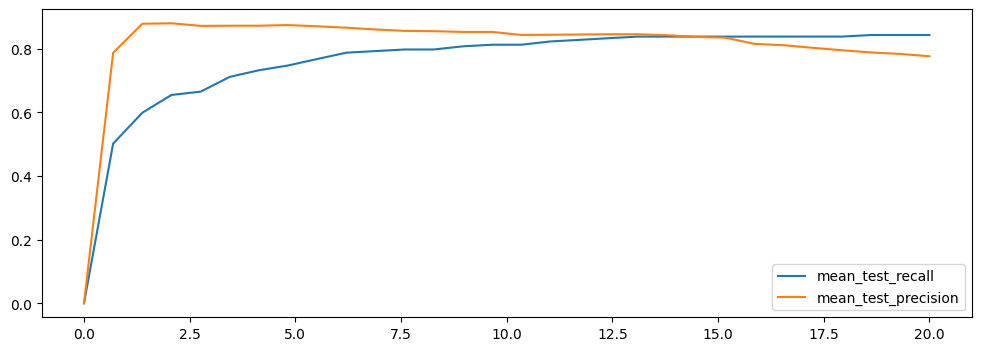

In [23]:
plt.figure(figsize  =(12,4))
for score in ['mean_test_recall','mean_test_precision'] : 
    plt.plot([ _[1] for _ in df_new['param_class_weight']], 
            df_new[score] ,
            label = score)
plt.legend() ; 


In [26]:
#making a custom testing parameter min(precision,recall)
def min_both(y_true ,y_pred) : 
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    return min(recall,precision)
#since now we have our custom parameter we revaluate our custom model so that we can get the logistics regression going good
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter = 1000), 
    param_grid ={ 'class_weight'  :[{0:1,1:v} for v in np.linspace(0,20,30)]},
    scoring = {'precision':make_scorer(precision_score) ,'recall' : make_scorer(recall_score),'both_min' : make_scorer(min_both)}, 
    refit = 'both_min',
    return_train_score = True,
    cv  = 5,
    n_jobs = -1
)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: np.float64(0.0)},
                                          {0: 1,
                                           1: np.float64(0.6896551724137931)},
                                          {0: 1,
                                           1: np.float64(1.3793103448275863)},
                                          {0: 1,
                                           1: np.float64(2.0689655172413794)},
                                          {0: 1,
                                           1: np.float64(2.7586206896551726)},
                                          {0: 1,
                                           1: np.float64(3.4482758620689657)},
                                          {0: 1,
                                           1: np.float64(4.13793103448...
                                           1: np.float64(17.931034482758623)},
                                          {0: 1,
                                           1: np.float64(18.620689655172416)},
                                          {0: 1,
                                           1: np.float64(19.310344827586206)},
                                          {0: 1, 1: np.float64(20.0)}]},
             refit='both_min', return_train_score=True,
             scoring={'both_min': make_scorer(min_both, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [28]:
df = pd.DataFrame(grid.cv_results_)
df 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_both_min,std_test_both_min,rank_test_both_min,split0_train_both_min,split1_train_both_min,split2_train_both_min,split3_train_both_min,split4_train_both_min,mean_train_both_min,std_train_both_min
0,0.241802,0.063027,0.080172,0.026122,"{0: 1, 1: 0.0}","{'class_weight': {0: 1, 1: 0.0}}",0.093333,0.000000,0.000000,0.000000,...,0.018667,0.037333,30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.508337,0.131949,0.071484,0.013026,"{0: 1, 1: 0.6896551724137931}","{'class_weight': {0: 1, 1: 0.6896551724137931}}",0.005618,0.689655,0.954545,1.000000,...,0.364457,0.240837,29,0.681529,0.554140,0.522293,0.515924,0.608974,0.576572,0.061957
2,0.657090,0.112297,0.087388,0.011352,"{0: 1, 1: 1.3793103448275863}","{'class_weight': {0: 1, 1: 1.3793103448275863}}",0.004759,0.735294,0.961538,0.928571,...,0.430695,0.275246,28,0.789809,0.630573,0.617834,0.636943,0.698718,0.674775,0.063927
3,0.679668,0.099411,0.076131,0.013084,"{0: 1, 1: 2.0689655172413794}","{'class_weight': {0: 1, 1: 2.0689655172413794}}",0.004540,0.769231,0.962963,0.933333,...,0.501677,0.288351,27,0.847134,0.675159,0.687898,0.668790,0.750000,0.725796,0.067170
4,0.740289,0.066987,0.092265,0.024668,"{0: 1, 1: 2.7586206896551726}","{'class_weight': {0: 1, 1: 2.7586206896551726}}",0.004408,0.761905,0.962963,0.933333,...,0.505186,0.284596,26,0.859873,0.732484,0.707006,0.713376,0.777070,0.757962,0.056541
5,0.675006,0.045288,0.075906,0.007885,"{0: 1, 1: 3.4482758620689657}","{'class_weight': {0: 1, 1: 3.4482758620689657}}",0.004324,0.767442,0.964286,0.933333,...,0.521404,0.284618,25,0.866242,0.777070,0.745223,0.751592,0.779874,0.784000,0.043319
6,0.776357,0.108113,0.082616,0.009237,"{0: 1, 1: 4.137931034482759}","{'class_weight': {0: 1, 1: 4.137931034482759}}",0.004312,0.750000,0.964286,0.933333,...,0.522914,0.280202,24,0.872611,0.802548,0.764331,0.757962,0.782609,0.796012,0.041331
7,0.808553,0.034593,0.090688,0.005739,"{0: 1, 1: 4.827586206896552}","{'class_weight': {0: 1, 1: 4.827586206896552}}",0.004254,0.739130,0.964286,0.935484,...,0.535856,0.280299,23,0.872611,0.821656,0.783439,0.770701,0.783951,0.806472,0.037208
8,0.763739,0.045826,0.076183,0.010438,"{0: 1, 1: 5.517241379310345}","{'class_weight': {0: 1, 1: 5.517241379310345}}",0.004214,0.739130,0.966667,0.935484,...,0.546105,0.286716,22,0.878981,0.821656,0.787879,0.789809,0.785276,0.812720,0.035681
9,0.756591,0.083377,0.077590,0.006678,"{0: 1, 1: 6.206896551724139}","{'class_weight': {0: 1, 1: 6.206896551724139}}",0.004221,0.739130,0.966667,0.941176,...,0.576491,0.297125,20,0.878981,0.834395,0.790419,0.788820,0.785276,0.815578,0.036445


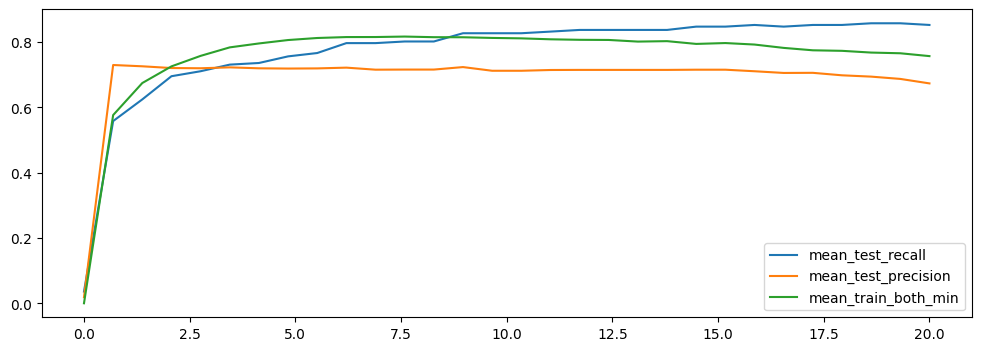

In [29]:
plt.figure(figsize  =(12,4))
for score in ['mean_test_recall','mean_test_precision','mean_train_both_min'] : 
    plt.plot([ _[1] for _ in df['param_class_weight']], 
            df[score] ,
            label = score)
plt.legend() ; 